In [3]:
# import 'pandas'
import pandas as pd

# import 'numpy'
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm

# import 'stats' package from scipy library
from scipy import stats

# import statistics to perform statistical computations
import statistics

# to test the normality
from scipy.stats import shapiro

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

### This week’s challenge focuses on developing a predictive model for food demand forecasting. Accurate forecasting is crucial for food supply chain management, allowing businesses to minimize waste and optimize inventory.

In [4]:
train = pd.read_csv(r"C:\Users\Ramya Shruthi\Downloads\Dataset\Dataset\Train.csv")
train.head()

,Period_No,Facility_No,Facility_Category,City_Zip_Code,Operational_Region_Coverage_Area,Billing_Amount,Labelled_Price,Custom_Promoted,Promoted,Search_Promotions,Orders_Count,Course,Flavour_Profile
0,1,324,c1,977,169,192.955562,267.971749,0,0,0,123,Finger Foods,Asian Fusion
1,1,10,c3,0,62,193.384864,203.836706,0,0,0,55,Broths & Stews,Asian Fusion
2,1,99,c3,0,167,384.988183,388.957411,0,0,0,204,Smoothies & Juices,Western
3,1,95,c3,17,2,255.251864,263.923874,0,0,0,257,Grain Bowls,South Asian
4,1,128,c3,17,18,319.949514,326.128813,0,0,0,14,Appetizers,Asian Fusion


In [5]:
test = pd.read_csv(r"C:\Users\Ramya Shruthi\Downloads\Dataset\Dataset\Test.csv")
test.head()

,Period_No,Facility_No,Facility_Category,City_Zip_Code,Operational_Region_Coverage_Area,Billing_Amount,Labelled_Price,Custom_Promoted,Promoted,Search_Promotions,Course,Flavour_Profile
0,101,56,c1,0,1,139.958249,169.692414,0,0,0,Smoothies & Juices,Asian Fusion
1,101,5,c2,977,23595,326.909659,333.530773,0,0,0,Fresh Greens,Mediterranean
2,101,988,c2,17,2,320.866835,328.095148,0,0,0,Smoothies & Juices,Western
3,101,36,c2,0,12,469.922362,476.656331,0,0,0,Smoothies & Juices,Western
4,101,24,c1,0,66,248.252845,326.033774,0,0,0,Grain Bowls,South Asian


In [6]:
## This week’s challenge focuses on developing a predictive model for food demand forecasting. Accurate forecasting is crucial for food supply chain management, allowing businesses to minimize waste and optimize inventory.

## About the Dataset
## The dataset consists of historical food demand data from various facilities, regions, and categories. You’ll analyze patterns and trends to predict future demand for food items, helping businesses make informed decisions.

## Dataset Description:

## Train.csv: Contains historical data with features like food items, demand quantity, and additional contextual information (e.g., promotions types).
## Test.csv: The dataset for which you will generate predictions.
## Submission.csv: The format for submitting your predictions.

In [7]:
train.shape,test.shape


((321437, 13), (118070, 12))

In [8]:
combined = pd.concat([train,test],ignore_index=True)

In [9]:
train.shape,test.shape,combined.shape


((321437, 13), (118070, 12), (439507, 13))

In [10]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439507 entries, 0 to 439506
Data columns (total 13 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Period_No                         439507 non-null  int64  
 1   Facility_No                       439507 non-null  int64  
 2   Facility_Category                 439507 non-null  object 
 3   City_Zip_Code                     439507 non-null  int64  
 4   Operational_Region_Coverage_Area  439507 non-null  int64  
 5   Billing_Amount                    439507 non-null  float64
 6   Labelled_Price                    439507 non-null  float64
 7   Custom_Promoted                   439507 non-null  int64  
 8   Promoted                          439507 non-null  int64  
 9   Search_Promotions                 439507 non-null  int64  
 10  Orders_Count                      321437 non-null  float64
 11  Course                            439507 non-null  o

In [11]:
combined.describe()

,Period_No,Facility_No,City_Zip_Code,Operational_Region_Coverage_Area,Billing_Amount,Labelled_Price,Custom_Promoted,Promoted,Search_Promotions,Orders_Count
count,439507.000000,439507.000000,439507.000000,439507.000000,439507.000000,439507.000000,439507.000000,439507.000000,439507.000000,321437.000000
mean,68.885026,423.663327,270.887221,420.366488,329.977449,360.773169,0.080606,0.108194,0.066019,261.533790
std,40.084752,1586.030749,404.163803,2672.320078,152.834569,161.004387,0.272230,0.310626,0.248316,383.785233
min,1.000000,3.000000,0.000000,1.000000,-1.102747,59.937296,0.000000,0.000000,0.000000,13.000000
25%,34.000000,36.000000,0.000000,13.000000,226.485428,249.842496,0.000000,0.000000,0.000000,54.000000
50%,68.000000,78.000000,17.000000,48.000000,293.421968,317.823258,0.000000,0.000000,0.000000,136.000000
75%,103.000000,132.000000,582.000000,140.000000,440.822464,466.755727,0.000000,0.000000,0.000000,324.000000
max,140.000000,12390.000000,977.000000,23595.000000,864.305642,876.832957,1.000000,1.000000,1.000000,13150.000000


In [12]:
combined.shape

(439507, 13)

In [13]:
(1+2+3+4+5+6)/6

3.5

In [14]:
combined.isnull().sum()

Period_No                                0
Facility_No                              0
Facility_Category                        0
City_Zip_Code                            0
Operational_Region_Coverage_Area         0
Billing_Amount                           0
Labelled_Price                           0
Custom_Promoted                          0
Promoted                                 0
Search_Promotions                        0
Orders_Count                        118070
Course                                   0
Flavour_Profile                          0
dtype: int64

In [15]:
combined.head(5)

,Period_No,Facility_No,Facility_Category,City_Zip_Code,Operational_Region_Coverage_Area,Billing_Amount,Labelled_Price,Custom_Promoted,Promoted,Search_Promotions,Orders_Count,Course,Flavour_Profile
0,1,324,c1,977,169,192.955562,267.971749,0,0,0,123.0,Finger Foods,Asian Fusion
1,1,10,c3,0,62,193.384864,203.836706,0,0,0,55.0,Broths & Stews,Asian Fusion
2,1,99,c3,0,167,384.988183,388.957411,0,0,0,204.0,Smoothies & Juices,Western
3,1,95,c3,17,2,255.251864,263.923874,0,0,0,257.0,Grain Bowls,South Asian
4,1,128,c3,17,18,319.949514,326.128813,0,0,0,14.0,Appetizers,Asian Fusion


In [16]:
combined.select_dtypes(include="object").columns

Index(['Facility_Category', 'Course', 'Flavour_Profile'], dtype='object')

In [17]:
combined.select_dtypes(np.number).columns

Index(['Period_No', 'Facility_No', 'City_Zip_Code',
       'Operational_Region_Coverage_Area', 'Billing_Amount', 'Labelled_Price',
       'Custom_Promoted', 'Promoted', 'Search_Promotions', 'Orders_Count'],
      dtype='object')

### EDA
1. Univariate 
2. Bivariate 
3. Missing Values
4. Outlier Identification
5. Feature Engineering 
6. Statistical Hypothesis Test
7. Scaling and Transformation 
8. Model Building 

In [18]:
num = ['Billing_Amount', 'Labelled_Price','Orders_Count']

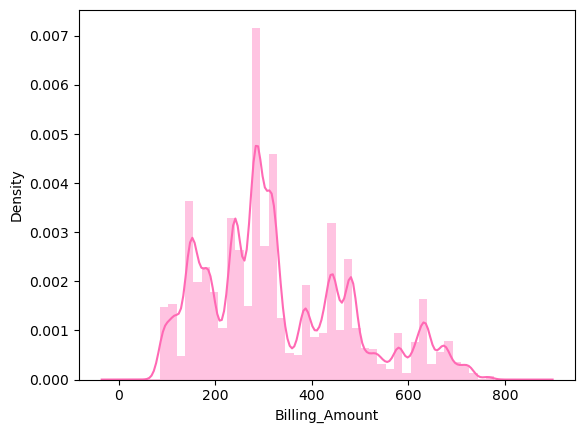

In [19]:
#Billing Amount 
sns.distplot(combined["Billing_Amount"],color="hotpink")
plt.show()

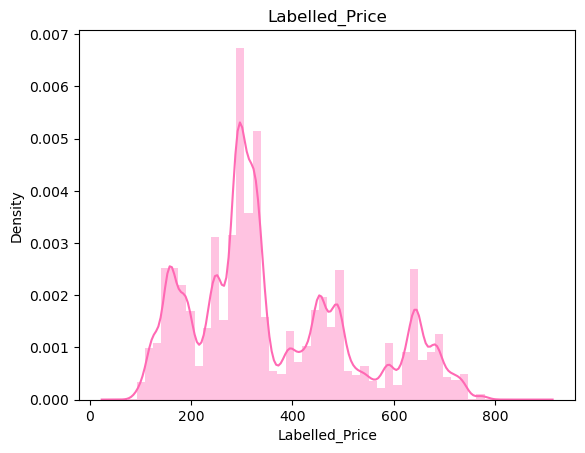

In [20]:
#Labelled_Price
sns.distplot(combined["Labelled_Price"],color="hotpink")
plt.title("Labelled_Price")
plt.show()

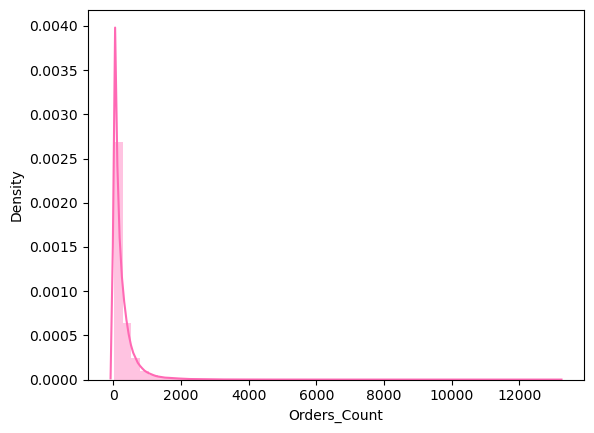

In [21]:
#Order_Count
sns.distplot(combined["Orders_Count"],color="hotpink")
plt.show()

In [22]:
combined[["Orders_Count"]].describe()

,Orders_Count
count,321437.000000
mean,261.533790
std,383.785233
min,13.000000
25%,54.000000
50%,136.000000
75%,324.000000
max,13150.000000


In [23]:
#Top 5 Facilities
combined.Facility_No.value_counts()[:5].index

Index([63, 13, 87, 112, 36], dtype='int64', name='Facility_No')

In [24]:
top5 = [63, 13, 87, 112, 36]

def facility(x):
    if x in top5:
        return("Top5")
    else:
        return("Others")
combined["Facility"] = combined.Facility_No.apply(facility)

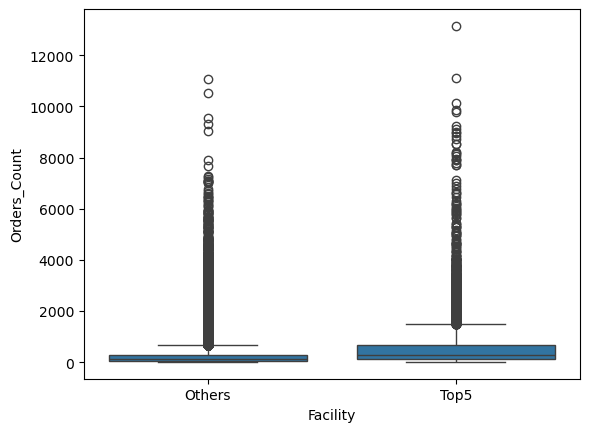

In [25]:
sns.boxplot(x="Facility",y="Orders_Count",data=combined)
plt.show()

In [26]:
combined["Facility"].value_counts()

Facility
Others    405862
Top5       33645
Name: count, dtype: int64

In [27]:
combined["Operational_Region_Coverage_Area"].value_counts()[:5].index

Index([62, 41, 574, 12, 1], dtype='int64', name='Operational_Region_Coverage_Area')

In [28]:

def facility(x):
    if x in Top5op:
        return("Top5")
    else:
        return("Others")

In [29]:
Top5op= [62, 41, 574, 12, 1]
combined["Op_Area"] = combined.Operational_Region_Coverage_Area.apply(facility)

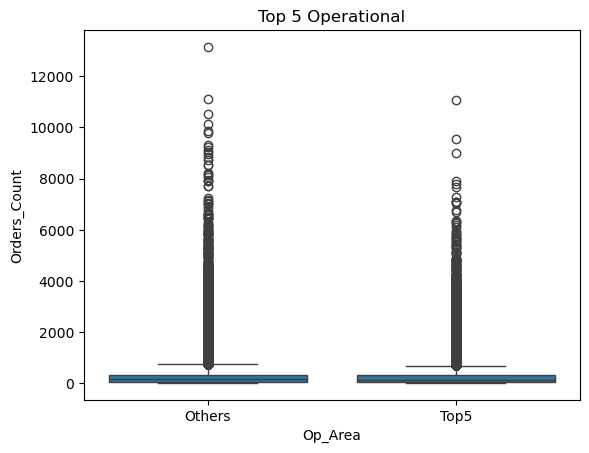

In [30]:
sns.boxplot(x=combined["Op_Area"],y=combined["Orders_Count"])
plt.title("Top 5 Operational")
plt.show()


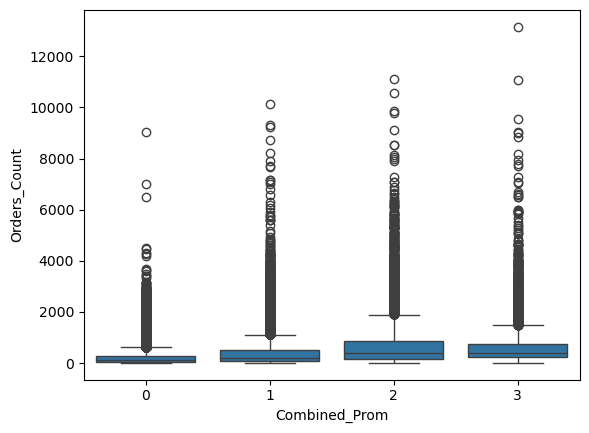

In [31]:
#Connect All The Promotional Columns 
combined["Combined_Prom"]=combined["Custom_Promoted"]+combined["Promoted"]+combined["Search_Promotions"]
sns.boxplot(x=combined["Combined_Prom"],y=combined["Orders_Count"])
plt.show()

In [32]:
combined["Course"].unique()

array(['Finger Foods', 'Broths & Stews', 'Smoothies & Juices',
       'Grain Bowls', 'Appetizers', 'Grilled Vegetables',
       'Sweets & Treats', 'Wraps & Rolls', 'Noodles & Veggies',
       'Fresh Greens', 'Condiments & Dips', 'Plant-Based Proteins',
       'Stir-Fried Rice', 'Flatbreads'], dtype=object)

In [33]:
combined.groupby("Flavour_Profile")["Course"].value_counts(ascending=False)
# Smoothies & Juices 
#  Wraps & Rolls 
# Grain Bowls
#  Flatbreads

Flavour_Profile  Course              
Asian Fusion     Smoothies & Juices      31344
                 Appetizers              28707
                 Finger Foods            28244
                 Condiments & Dips       13020
                 Broths & Stews          12191
Mediterranean    Smoothies & Juices      32050
                 Wraps & Rolls           31951
                 Fresh Greens            28398
                 Noodles & Veggies       26523
South Asian      Grain Bowls             32048
                 Smoothies & Juices      28125
                 Sweets & Treats         28107
                 Stir-Fried Rice         19676
Western          Flatbreads              31812
                 Smoothies & Juices      31285
                 Plant-Based Proteins    25905
                 Grilled Vegetables      10121
Name: count, dtype: int64

In [34]:
foods = ["Smoothies & Juices","Wraps & Rolls","Grain Bowls","Flatbreads"]

def khana(x):
    if x in foods:
        return("Top5_Foods")
    else:
        return("Other_Foods")
    
combined["Course_Cat"]= combined["Course"].apply(khana)

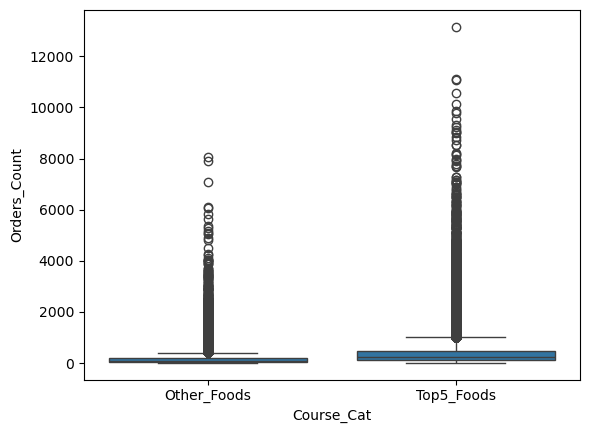

In [35]:
sns.boxplot(x=combined["Course_Cat"],y=combined["Orders_Count"])
plt.show()

In [36]:
#Facility Number
combined.groupby("Facility_No")["Orders_Count"].describe()

,count,mean,std,min,25%,50%,75%,max
Facility_No,,,,,,,,
3,3847.0,179.099038,196.578163,13.0,42.0,122.0,243.0,2052.0
4,3686.0,196.133749,243.226825,13.0,41.0,123.0,270.0,3523.0
5,4171.0,282.143131,277.867416,13.0,95.0,203.0,378.0,2753.0
6,3677.0,179.811803,207.581795,13.0,41.0,121.0,244.0,2970.0
7,4218.0,195.700806,251.982207,13.0,41.0,107.0,269.0,4227.0
...,...,...,...,...,...,...,...,...
988,4314.0,278.150672,279.311236,13.0,82.0,189.0,379.0,2957.0
1476,4227.0,207.433877,243.021249,13.0,54.0,134.0,284.0,3295.0
1836,4149.0,280.976139,448.862979,13.0,41.0,108.0,379.0,7073.0


In [37]:

combined["Magic1"] = combined.groupby("Facility_No")[["Orders_Count"]].transform("count")
combined["Magic2"] = combined.groupby("Facility_No")[["Orders_Count"]].transform("min")
combined["Magic3"] = combined.groupby("Facility_No")[["Orders_Count"]].transform("max")
combined["Magic4"] = combined.groupby("Facility_No")[["Orders_Count"]].transform("mean")
combined["Magic5"] = combined.groupby("Facility_No")[["Orders_Count"]].transform("median")
combined["Magic6"] = combined.groupby("Facility_No")[["Orders_Count"]].transform("std")

In [38]:
combined["Magic7"] = combined.groupby("City_Zip_Code")["Orders_Count"].transform("count")
combined["Magic8"] = combined.groupby("City_Zip_Code")["Orders_Count"].transform("min")
combined["Magic9"] = combined.groupby("City_Zip_Code")["Orders_Count"].transform("max")
combined["Magic10"] = combined.groupby("City_Zip_Code")["Orders_Count"].transform("mean")
combined["Magic11"] = combined.groupby("City_Zip_Code")["Orders_Count"].transform("median")
combined["Magic12"] = combined.groupby("City_Zip_Code")["Orders_Count"].transform("std")

In [39]:
combined.groupby("City_Zip_Code")["Orders_Count"].describe()

,count,mean,std,min,25%,50%,75%,max
City_Zip_Code,,,,,,,,
0,134451.0,318.114131,464.342597,13.0,55.0,161.0,404.0,13150.0
17,81986.0,203.351487,263.878412,13.0,53.0,122.0,269.0,6426.0
153,4511.0,245.492795,344.797660,13.0,42.0,109.0,323.5,3849.0
357,4041.0,235.813660,489.664875,13.0,53.0,121.0,256.0,9303.0
582,21943.0,286.437224,385.943459,13.0,55.0,149.0,365.0,7073.0
601,3671.0,121.629256,132.423545,13.0,28.0,81.0,175.0,1849.0
863,4474.0,334.867456,535.232145,13.0,54.0,134.0,432.0,7155.0
977,66360.0,215.997107,289.687066,13.0,53.0,134.0,284.0,9532.0


In [40]:
combined.groupby("Course")["Orders_Count"].describe()

,count,mean,std,min,25%,50%,75%,max
Course,,,,,,,,
Appetizers,20382.0,155.968992,143.935574,13.0,54.0,109.0,215.0,1554.0
Broths & Stews,8889.0,88.900551,72.350096,13.0,40.0,68.0,121.0,689.0
Condiments & Dips,9350.0,281.830909,222.736124,13.0,122.0,216.0,391.0,1620.0
Finger Foods,20895.0,164.194783,164.063729,13.0,54.0,121.0,216.0,2404.0
Flatbreads,22779.0,233.691382,235.383834,13.0,82.0,161.0,296.0,2499.0
Fresh Greens,22850.0,389.665996,372.423667,13.0,190.0,298.0,459.0,8059.0
Grain Bowls,22937.0,600.332825,614.775419,13.0,257.0,433.0,729.0,10544.0
Grilled Vegetables,10121.0,85.583638,80.312274,13.0,28.0,67.0,109.0,879.0
Noodles & Veggies,18601.0,58.128111,53.681616,13.0,26.0,41.0,69.0,690.0


In [41]:
combined["Magic13"] = combined.groupby("Course")["Orders_Count"].transform("count")
combined["Magic14"] = combined.groupby("Course")["Orders_Count"].transform("min")
combined["Magic15"] = combined.groupby("Course")["Orders_Count"].transform("max")
combined["Magic16"] = combined.groupby("Course")["Orders_Count"].transform("mean")
combined["Magic17"] = combined.groupby("Course")["Orders_Count"].transform("median")
combined["Magic18"] = combined.groupby("Course")["Orders_Count"].transform("std")

In [42]:
combined

,Period_No,Facility_No,Facility_Category,City_Zip_Code,Operational_Region_Coverage_Area,Billing_Amount,Labelled_Price,Custom_Promoted,Promoted,Search_Promotions,...,Magic9,Magic10,Magic11,Magic12,Magic13,Magic14,Magic15,Magic16,Magic17,Magic18
0,1,324,c1,977,169,192.955562,267.971749,0,0,0,...,9532.0,215.997107,134.0,289.687066,20895,13.0,2404.0,164.194783,121.0,164.063729
1,1,10,c3,0,62,193.384864,203.836706,0,0,0,...,13150.0,318.114131,161.0,464.342597,8889,13.0,689.0,88.900551,68.0,72.350096
2,1,99,c3,0,167,384.988183,388.957411,0,0,0,...,13150.0,318.114131,161.0,464.342597,88363,13.0,9303.0,314.610233,188.0,381.076319
3,1,95,c3,17,2,255.251864,263.923874,0,0,0,...,6426.0,203.351487,122.0,263.878412,22937,13.0,10544.0,600.332825,433.0,614.775419
4,1,128,c3,17,18,319.949514,326.128813,0,0,0,...,6426.0,203.351487,122.0,263.878412,20382,13.0,1554.0,155.968992,109.0,143.935574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439502,140,72,c3,17,62,223.417743,231.474654,0,0,0,...,6426.0,203.351487,122.0,263.878412,88363,13.0,9303.0,314.610233,188.0,381.076319
439503,140,17,c1,0,12,247.524646,254.581424,0,0,0,...,13150.0,318.114131,161.0,464.342597,8889,13.0,689.0,88.900551,68.0,72.350096
439504,140,72,c3,17,62,140.225626,313.764976,0,0,1,...,6426.0,203.351487,122.0,263.878412,22937,13.0,10544.0,600.332825,433.0,614.775419
439505,140,1836,c3,582,62,482.280994,488.808394,0,0,0,...,7073.0,286.437224,149.0,385.943459,14143,13.0,202.0,30.439086,26.0,21.804170


In [43]:
combined["Magic19"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform("count")
combined["Magic20"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform("min")
combined["Magic21"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform("max")
combined["Magic22"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform("mean")
combined["Magic23"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform("median")
combined["Magic24"] = combined.groupby("Operational_Region_Coverage_Area")["Orders_Count"].transform("std")

In [44]:
combined

,Period_No,Facility_No,Facility_Category,City_Zip_Code,Operational_Region_Coverage_Area,Billing_Amount,Labelled_Price,Custom_Promoted,Promoted,Search_Promotions,...,Magic15,Magic16,Magic17,Magic18,Magic19,Magic20,Magic21,Magic22,Magic23,Magic24
0,1,324,c1,977,169,192.955562,267.971749,0,0,0,...,2404.0,164.194783,121.0,164.063729,18103,13.0,10544.0,313.646523,148.0,473.337118
1,1,10,c3,0,62,193.384864,203.836706,0,0,0,...,689.0,88.900551,68.0,72.350096,36987,13.0,9532.0,222.396247,122.0,329.431315
2,1,99,c3,0,167,384.988183,388.957411,0,0,0,...,9303.0,314.610233,188.0,381.076319,6653,13.0,4009.0,160.297760,94.0,224.186851
3,1,95,c3,17,2,255.251864,263.923874,0,0,0,...,10544.0,600.332825,433.0,614.775419,7575,13.0,4726.0,244.712739,149.0,298.571900
4,1,128,c3,17,18,319.949514,326.128813,0,0,0,...,1554.0,155.968992,109.0,143.935574,17767,13.0,5334.0,184.067372,107.0,252.308016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439502,140,72,c3,17,62,223.417743,231.474654,0,0,0,...,9303.0,314.610233,188.0,381.076319,36987,13.0,9532.0,222.396247,122.0,329.431315
439503,140,17,c1,0,12,247.524646,254.581424,0,0,0,...,689.0,88.900551,68.0,72.350096,19283,13.0,9019.0,355.180159,176.0,483.608469
439504,140,72,c3,17,62,140.225626,313.764976,0,0,1,...,10544.0,600.332825,433.0,614.775419,36987,13.0,9532.0,222.396247,122.0,329.431315
439505,140,1836,c3,582,62,482.280994,488.808394,0,0,0,...,202.0,30.439086,26.0,21.804170,36987,13.0,9532.0,222.396247,122.0,329.431315


In [45]:
combined.columns

Index(['Period_No', 'Facility_No', 'Facility_Category', 'City_Zip_Code',
       'Operational_Region_Coverage_Area', 'Billing_Amount', 'Labelled_Price',
       'Custom_Promoted', 'Promoted', 'Search_Promotions', 'Orders_Count',
       'Course', 'Flavour_Profile', 'Facility', 'Op_Area', 'Combined_Prom',
       'Course_Cat', 'Magic1', 'Magic2', 'Magic3', 'Magic4', 'Magic5',
       'Magic6', 'Magic7', 'Magic8', 'Magic9', 'Magic10', 'Magic11', 'Magic12',
       'Magic13', 'Magic14', 'Magic15', 'Magic16', 'Magic17', 'Magic18',
       'Magic19', 'Magic20', 'Magic21', 'Magic22', 'Magic23', 'Magic24'],
      dtype='object')

In [46]:
#Period_No. is a Time Series data so we are dropping it now

In [47]:
new = combined.drop(columns=["Period_No",'Facility_No', 'Facility_Category', 'City_Zip_Code',
       'Operational_Region_Coverage_Area','Custom_Promoted', 'Promoted', 'Search_Promotions','Course'],axis=1)

In [48]:
#Split the Data into Train and test 
newtrain = new.loc[0:train.shape[0]-1,:]
newtest = new.loc[train.shape[0]:,:]

In [49]:
newtest.columns

Index(['Billing_Amount', 'Labelled_Price', 'Orders_Count', 'Flavour_Profile',
       'Facility', 'Op_Area', 'Combined_Prom', 'Course_Cat', 'Magic1',
       'Magic2', 'Magic3', 'Magic4', 'Magic5', 'Magic6', 'Magic7', 'Magic8',
       'Magic9', 'Magic10', 'Magic11', 'Magic12', 'Magic13', 'Magic14',
       'Magic15', 'Magic16', 'Magic17', 'Magic18', 'Magic19', 'Magic20',
       'Magic21', 'Magic22', 'Magic23', 'Magic24'],
      dtype='object')

In [50]:
newtest

,Billing_Amount,Labelled_Price,Orders_Count,Flavour_Profile,Facility,Op_Area,Combined_Prom,Course_Cat,Magic1,Magic2,...,Magic15,Magic16,Magic17,Magic18,Magic19,Magic20,Magic21,Magic22,Magic23,Magic24
321437,139.958249,169.692414,NaN,Asian Fusion,Others,Top5,0,Top5_Foods,4836,13.0,...,9303.0,314.610233,188.0,381.076319,18304,13.0,11056.0,320.103748,175.0,457.274632
321438,326.909659,333.530773,NaN,Mediterranean,Others,Others,0,Other_Foods,4171,13.0,...,8059.0,389.665996,298.0,372.423667,4171,13.0,2753.0,282.143131,203.0,277.867416
321439,320.866835,328.095148,NaN,Western,Others,Others,0,Top5_Foods,4314,13.0,...,9303.0,314.610233,188.0,381.076319,7575,13.0,4726.0,244.712739,149.0,298.571900
321440,469.922362,476.656331,NaN,Western,Top5,Top5,0,Top5_Foods,4892,13.0,...,9303.0,314.610233,188.0,381.076319,19283,13.0,9019.0,355.180159,176.0,483.608469
321441,248.252845,326.033774,NaN,South Asian,Others,Others,0,Top5_Foods,4794,13.0,...,10544.0,600.332825,433.0,614.775419,4794,13.0,5873.0,418.440968,216.0,539.449725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439502,223.417743,231.474654,NaN,Mediterranean,Others,Top5,0,Top5_Foods,3784,13.0,...,9303.0,314.610233,188.0,381.076319,36987,13.0,9532.0,222.396247,122.0,329.431315
439503,247.524646,254.581424,NaN,Asian Fusion,Others,Top5,0,Other_Foods,4885,13.0,...,689.0,88.900551,68.0,72.350096,19283,13.0,9019.0,355.180159,176.0,483.608469
439504,140.225626,313.764976,NaN,South Asian,Others,Top5,1,Top5_Foods,3784,13.0,...,10544.0,600.332825,433.0,614.775419,36987,13.0,9532.0,222.396247,122.0,329.431315
439505,482.280994,488.808394,NaN,South Asian,Others,Top5,0,Other_Foods,4149,13.0,...,202.0,30.439086,26.0,21.804170,36987,13.0,9532.0,222.396247,122.0,329.431315


In [51]:
nums = ['Billing_Amount', 'Labelled_Price', 'Magic1',
       'Magic2', 'Magic3', 'Magic4', 'Magic5', 'Magic6', 'Magic7', 'Magic8',
       'Magic9', 'Magic10', 'Magic11', 'Magic12', 'Magic13', 'Magic14',
       'Magic15', 'Magic16', 'Magic17', 'Magic18', 'Magic19', 'Magic20',
       'Magic21', 'Magic22', 'Magic23', 'Magic24']

In [52]:
pvals = []

for i in nums:
    tstat,pval = stats.ttest_ind(newtrain.loc[:,i],newtrain["Orders_Count"])
    pvals.append(pval)

In [53]:
pd.DataFrame(pvals,index=nums,columns=["Pvalue"])

,Pvalue
Billing_Amount,0.000000e+00
Labelled_Price,0.000000e+00
Magic1,0.000000e+00
Magic2,0.000000e+00
Magic3,0.000000e+00
Magic4,1.000000e+00
Magic5,0.000000e+00
Magic6,0.000000e+00
Magic7,0.000000e+00
Magic8,0.000000e+00


In [54]:
#Anova 
cats = ["Facility","Op_Area","Combined_Prom","Course_Cat"]

model = ols("Orders_Count~Facility+Op_Area+Combined_Prom+Course_Cat",data=newtrain).fit()
print(anova_lm(model))

                     df        sum_sq       mean_sq             F   PR(>F)
Facility            1.0  1.605818e+09  1.605818e+09  13852.301936  0.00000
Op_Area             1.0  9.465816e+05  9.465816e+05      8.165518  0.00427
Course_Cat          1.0  4.440800e+09  4.440800e+09  38307.770964  0.00000
Combined_Prom       1.0  4.035336e+09  4.035336e+09  34810.113018  0.00000
Residual       321432.0  3.726176e+10  1.159242e+05           NaN      NaN
